In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [57]:
df=pd.read_csv(r"D:\datasets\bank\transformed_bank_data_full.csv",encoding='utf-8')
df_raw = pd.read_csv(r"D:\datasets\bank\clean_bank_data_full.csv",encoding='utf-8')  


In [58]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
defaulted    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
le= LabelEncoder()
label_cols=['defaulted','housing','loan']
for col in label_cols:
    df[col]=le.fit_transform(df[col])
print(df[label_cols].head())

   defaulted  housing  loan
0          0        1     0
1          0        0     0
2          0        1     0
3          0        1     0
4          0        0     0


In [60]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)
print(df.head())

   age  defaulted  balance  housing  loan  day  duration  campaign  pdays  \
0   59          0     2343        1     0    5      1042         1     -1   
1   56          0       45        0     0    5      1467         1     -1   
2   41          0     1270        1     0    5      1389         1     -1   
3   55          0     2476        1     0    5       579         1     -1   
4   54          0      184        0     0    5       673         2     -1   

   previous  ... month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...     False      False      False       True      False   
1         0  ...     False      False      False       True      False   
2         0  ...     False      False      False       True      False   
3         0  ...     False      False      False       True      False   
4         0  ...     False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0      False  

In [61]:
X = df.drop(columns=['y'])
df['y']=df['y'].map({'yes':1,"no":0})
y = df['y']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Create an XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [64]:
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.60%


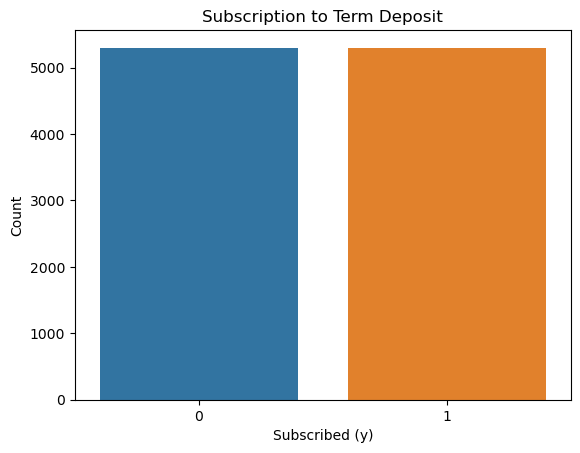

In [65]:
#target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title('Subscription to Term Deposit')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

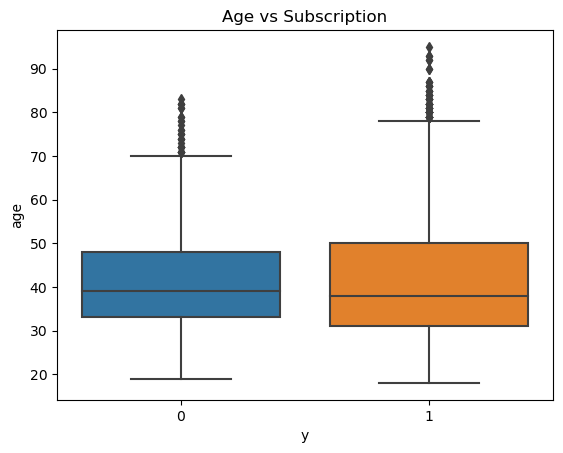

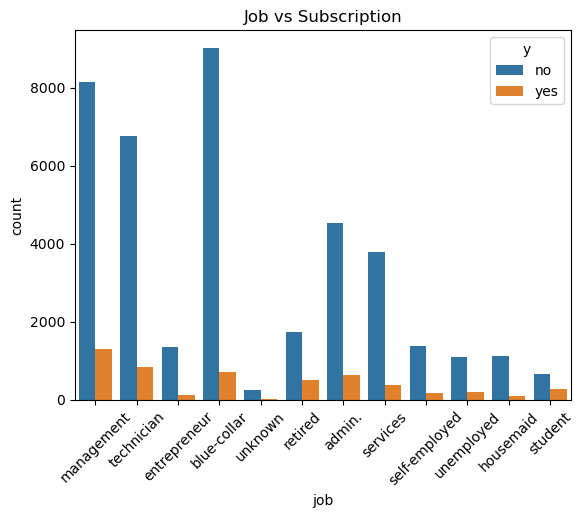

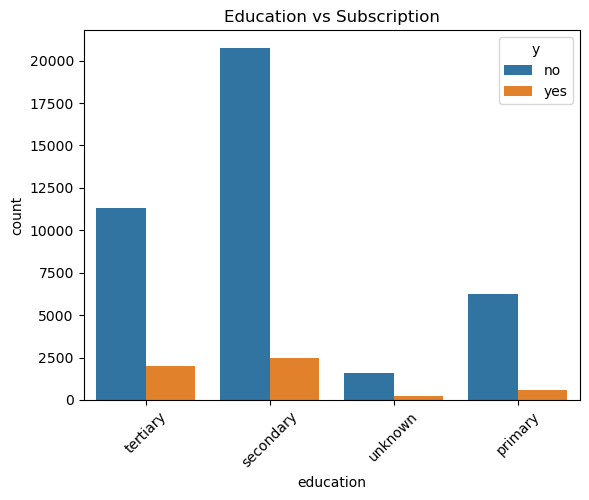

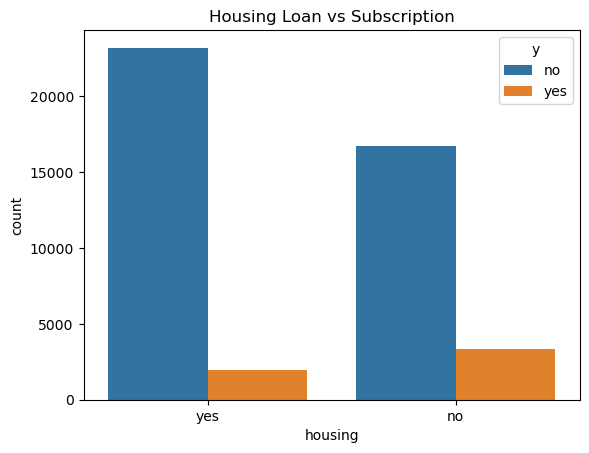

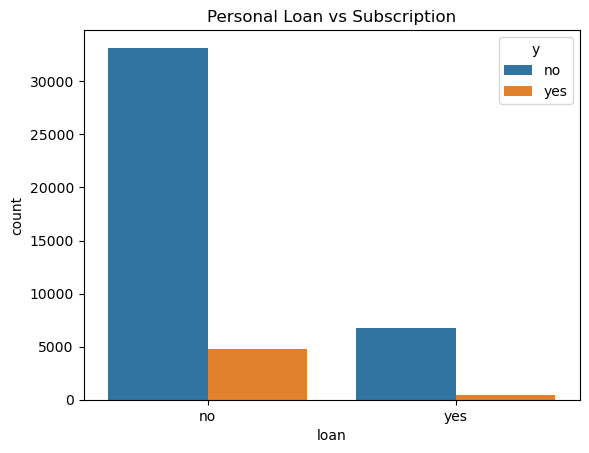

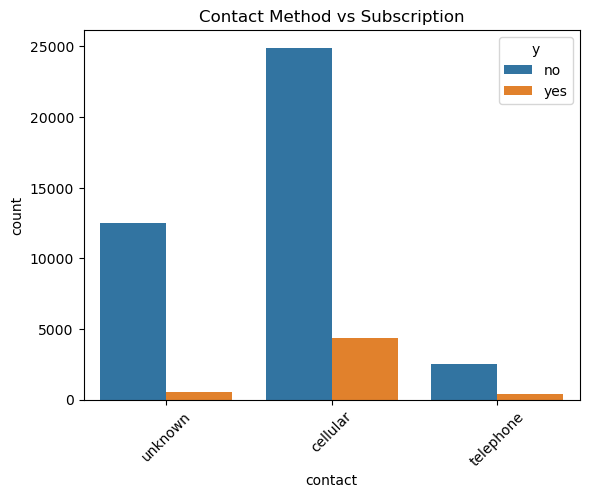

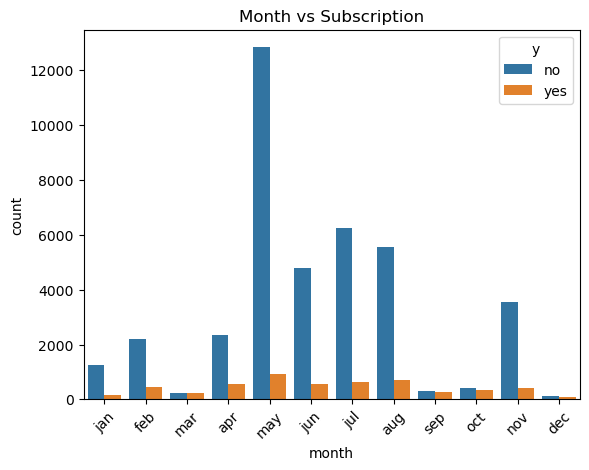

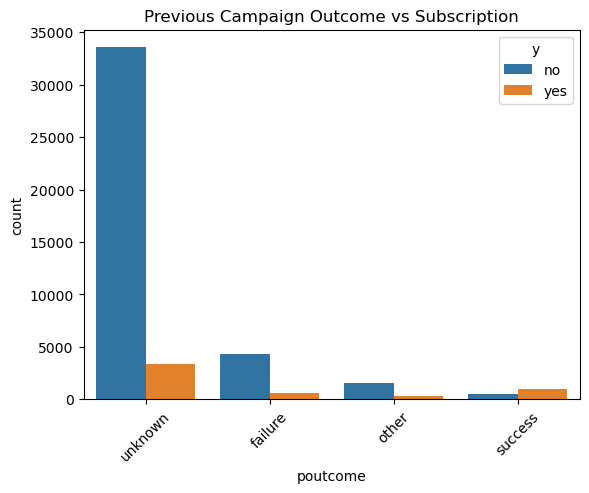

In [66]:
#key feature relationship
# Age vs Subscription
sns.boxplot(x='y', y='age', data=df)
plt.title('Age vs Subscription')
plt.show()

# Job vs Subscription
sns.countplot(data=df_raw, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Job vs Subscription')
plt.show()

# Education vs Subscription
sns.countplot(data=df_raw, x='education', hue='y')
plt.xticks(rotation=45)
plt.title('Education vs Subscription')
plt.show()

#You can do similar plots for:housing, loan, contact, month, poutcome
# Housing vs Subscription
sns.countplot(data=df_raw, x='housing', hue='y')
plt.title('Housing Loan vs Subscription')
plt.show()

# Loan vs Subscription
sns.countplot(data=df_raw, x='loan', hue='y')
plt.title('Personal Loan vs Subscription')
plt.show()

# Contact vs Subscription
sns.countplot(data=df_raw, x='contact', hue='y')
plt.title('Contact Method vs Subscription')
plt.xticks(rotation=45)
plt.show()

# Month vs Subscription
sns.countplot(data=df_raw, x='month', hue='y',
              order=['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                     'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])  # Optional: Chronological order
plt.title('Month vs Subscription')
plt.xticks(rotation=45)
plt.show()

# Poutcome vs Subscription
sns.countplot(data=df_raw, x='poutcome', hue='y')
plt.title('Previous Campaign Outcome vs Subscription')
plt.xticks(rotation=45)
plt.show()


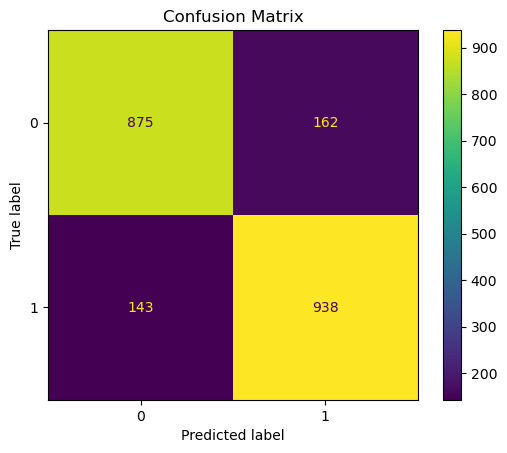

In [67]:
#model performance visualisation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [68]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1037
           1       0.85      0.87      0.86      1081

    accuracy                           0.86      2118
   macro avg       0.86      0.86      0.86      2118
weighted avg       0.86      0.86      0.86      2118



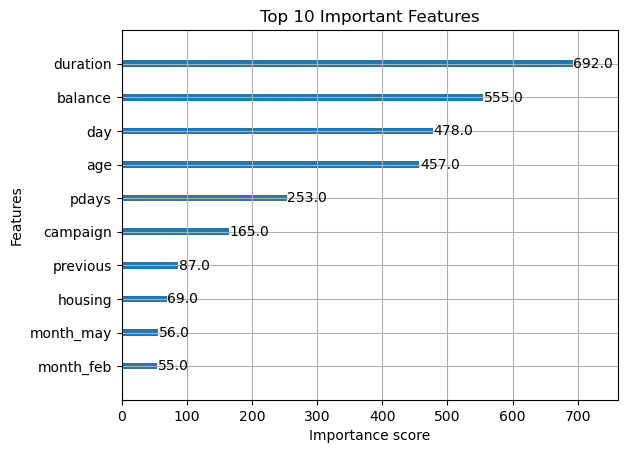

In [69]:
#feature importance
xgb.plot_importance(model, max_num_features=10)
plt.title('Top 10 Important Features')
plt.show()

In [70]:
print(df['y'].value_counts(normalize=True))

y
0    0.500425
1    0.499575
Name: proportion, dtype: float64


In [82]:

# Example new data (one customer)
new_data = pd.DataFrame({
    'age': [58],
    'job': ['blue-collared'],
    'education': ['tertiary'],
    'balance': [214],
    'default':['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['unknown'],
    'month': ['may'],
    'marital': ['married'],
    'duration': [26],
    'campaign': [1],
    'pdays': [-1],
    'previous': [0],
    'poutcome': ['unknown']
})

# Assuming you've already done the preprocessing (e.g., label encoding)
le = LabelEncoder()

# Encoding categorical columns
label_cols = ['housing', 'loan', 'contact', 'month', 'poutcome','default']
for col in label_cols:
    new_data[col] = le.fit_transform(new_data[col])

# You may also need to one-hot encode if you applied this to the training data
new_data = pd.get_dummies(new_data, columns=['job', 'education', 'contact', 'month', 'poutcome',"marital"], drop_first=True)

# Now ensure the new_data has the same columns as your training data
# Make sure to align with the training set's features (X)
new_data = new_data.reindex(columns=X.columns, fill_value=0)  # Align columns to training data

# Predict using the trained model
prediction = model.predict(new_data)

# Output the prediction (1 or 0)
print(f'Prediction for new data: {prediction[0]}')  # Prediction will be 1 or 0

Prediction for new data: 0
